# 📊 Forex Trading Predictions — Data Cleaning & Analysis Tutorial

This notebook guides you through data science steps using a faulty Forex dataset. You’ll clean, explore, and visualize it.

## 📌 Objectives
- Load and inspect data
- Clean bad data (empty cells, wrong formats, wrong entries, duplicates)
- Perform correlation analysis
- Visualize trends and relationships

## 📦 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 2. Load Dataset

In [2]:
df = pd.read_csv('forex_predictions_with_bad_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


## 🔍 3. Inspect Data

In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

## 🛑 4. Identify Bad Data

In [4]:
df[df.apply(lambda row: row.astype(str).str.contains('N/A|error|^$', regex=True).any(), axis=1)]

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
5,2024-01-06,1.07800,1.63260,0.68532,1.30289,error,1.00263,EUR/USD,Buy,0.69
54,2024-02-24,1.29895,NaN,0.63869,1.29782,error,1.33083,EUR/USD,Hold,0.77
65,2024-03-06,1.27135,1.78914,0.90690,1.03325,error,1.46629,EUR/USD,Buy,0.79
66,2024-03-07,1.07046,1.51797,0.84237,1.37056,error,1.03501,EUR/USD,Sell,0.84
74,2024-03-15,1.35343,1.68010,0.96636,1.40729,error,1.19914,EUR/USD,Hold,0.63
84,2024-03-25,1.15549,1.81871,0.98496,1.15069,error,1.29455,EUR/USD,Sell,0.59
104,2024-04-14,1.45378,1.63997,0.61432,1.15586,error,1.11528,EUR/USD,Hold,0.83
149,2024-05-29,1.13932,NaN,0.56444,NaN,error,1.03076,EUR/USD,Hold,0.76
150,2024-05-30,1.45413,NaN,0.56402,1.46278,error,1.44145,EUR/USD,Hold,0.62


## 🧹 5. Clean Data

In [5]:
df.replace(['N/A', 'error', ''], np.nan, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

## 📈 6. Correlation Analysis

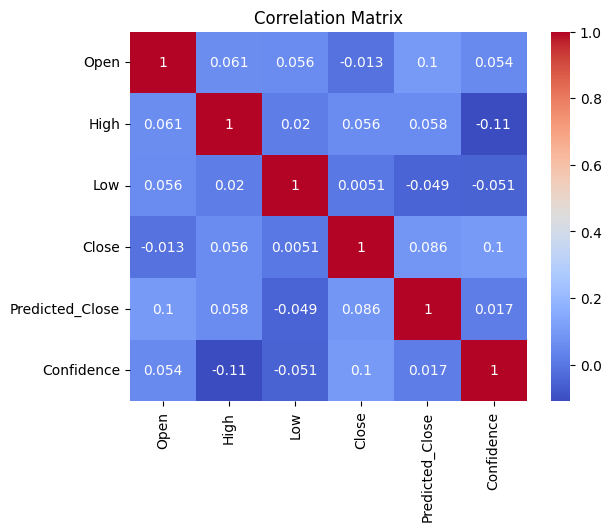

In [6]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 📊 7. Plotting and Visualization

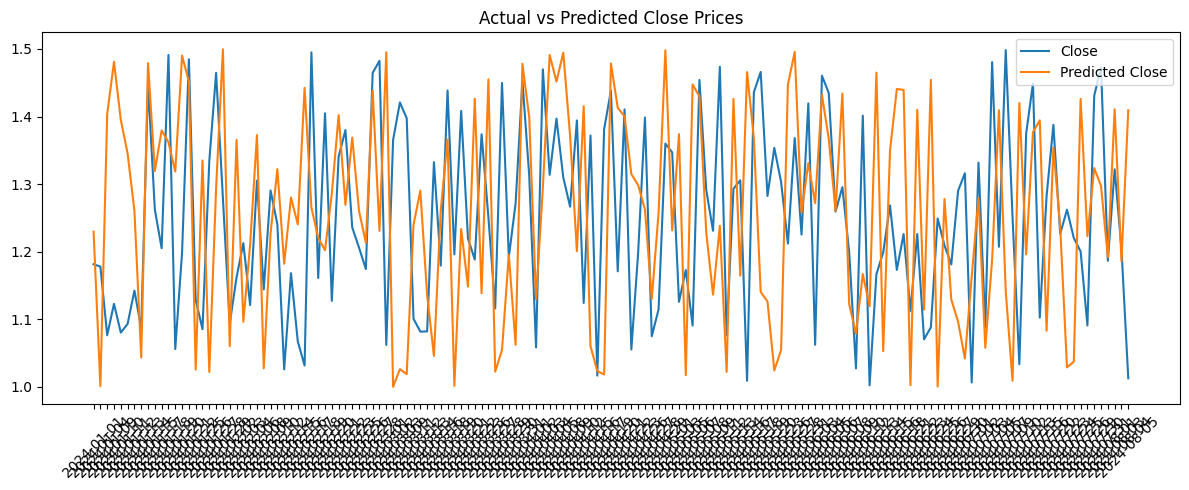

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

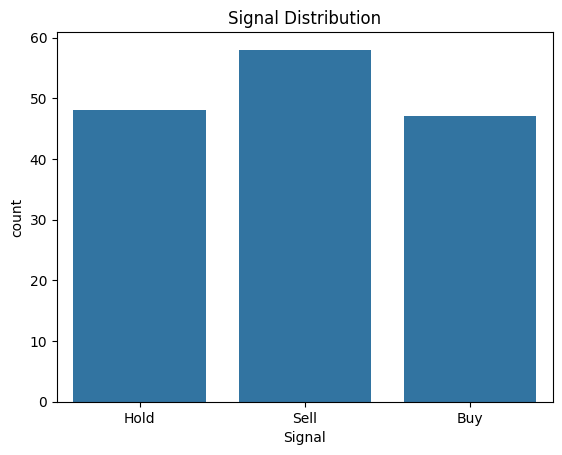

In [8]:
sns.countplot(x='Signal', data=df)
plt.title('Signal Distribution')
plt.show()

## 📜 8. Summary & Insights
- Discuss findings from the correlation matrix and plots